Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [6]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [7]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [9]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [17]:
p=pd.DataFrame(X_train)
p

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
329,6,105,70,32,68,30.8,0.122,37
13,1,189,60,23,846,30.1,0.398,59
476,2,105,80,45,191,33.7,0.711,29
45,0,180,66,39,0,42.0,1.893,25
...,...,...,...,...,...,...,...,...
303,5,115,98,0,0,52.9,0.209,28
592,3,132,80,0,0,34.4,0.402,44
559,11,85,74,0,0,30.1,0.300,35
725,4,112,78,40,0,39.4,0.236,38


Training the Model

# RNN

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


In [19]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [20]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200

20/20 [==============================] - 3s 30ms/step - loss: 0.4313 - val_loss: 0.4095
Epoch 2/200
20/20 [==============================] - 0s 7ms/step - loss: 0.3879 - val_loss: 0.3720
Epoch 3/200
20/20 [==============================] - 0s 7ms/step - loss: 0.3545 - val_loss: 0.3396
Epoch 4/200
20/20 [==============================] - 0s 8ms/step - loss: 0.3212 - val_loss: 0.3038
Epoch 5/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2876 - val_loss: 0.2732
Epoch 6/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2642 - val_loss: 0.2549
Epoch 7/200
20/20 [==============================] - 0s 8ms/step - loss: 0.2486 - val_loss: 0.2446
Epoch 8/200
20/20 [==============================] - 0s 8ms/step - loss: 0.2409 - val_loss: 0.2426
Epoch 9/200
20/20 [==============================] - 0s 9ms/step - loss: 0.2383 - val_loss: 0.2418
Epoch 10/200
20/20 [==============================] - 0s 8ms/step - loss: 0.2363 - val_loss: 0.2402
Epoch 1

Epoch 81/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1640 - val_loss: 0.1900
Epoch 82/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1629 - val_loss: 0.2138
Epoch 83/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1694 - val_loss: 0.1950
Epoch 84/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1698 - val_loss: 0.1849
Epoch 85/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1644 - val_loss: 0.1843
Epoch 86/200
20/20 [==============================] - 0s 8ms/step - loss: 0.1670 - val_loss: 0.1862
Epoch 87/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1634 - val_loss: 0.1841
Epoch 88/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1649 - val_loss: 0.1827
Epoch 89/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1643 - val_loss: 0.1840
Epoch 90/200
20/20 [==============================] - 0s 8ms/step - loss: 0.1626 - val_loss: 0.1861


20/20 [==============================] - 0s 8ms/step - loss: 0.1509 - val_loss: 0.1925
Epoch 163/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1479 - val_loss: 0.1956
Epoch 164/200
20/20 [==============================] - 0s 10ms/step - loss: 0.1512 - val_loss: 0.1976
Epoch 165/200
20/20 [==============================] - 0s 9ms/step - loss: 0.1472 - val_loss: 0.1896
Epoch 166/200
20/20 [==============================] - 0s 11ms/step - loss: 0.1458 - val_loss: 0.1921
Epoch 167/200
20/20 [==============================] - 0s 10ms/step - loss: 0.1468 - val_loss: 0.1907
Epoch 168/200
20/20 [==============================] - 0s 10ms/step - loss: 0.1476 - val_loss: 0.1945
Epoch 169/200
20/20 [==============================] - 0s 8ms/step - loss: 0.1474 - val_loss: 0.1890
Epoch 170/200
20/20 [==============================] - 0s 8ms/step - loss: 0.1492 - val_loss: 0.1923
Epoch 171/200
20/20 [==============================] - 0s 10ms/step - loss: 0.1459 - val_loss: 0.1886

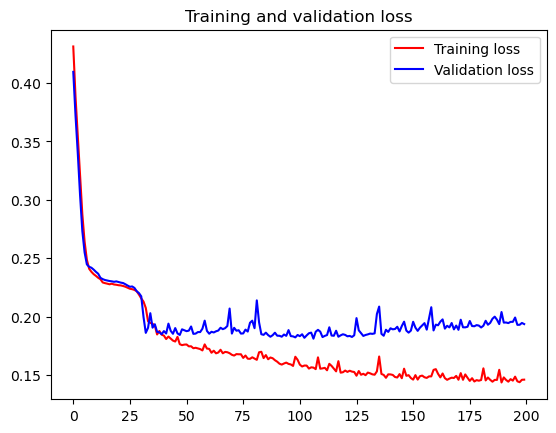

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 6ms/step


((614, 1), (154, 1))

# boostind model

In [23]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [24]:
clf.fit(X_train, Y_train.values.ravel()) 

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

In [25]:
print("TRAIN SET", clf.score(X_train, Y_train))
print("TEST  SET", clf.score(X_test, Y_test))

TRAIN SET 0.8566775244299675
TEST  SET 0.7402597402597403


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y.values.ravel(), cv=4)
scores

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([0.74479167, 0.71875   , 0.69791667, 0.75      ])

In [27]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.73 (+/- 0.04)


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [29]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['attack','not attack']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[89 11]
 [29 25]]


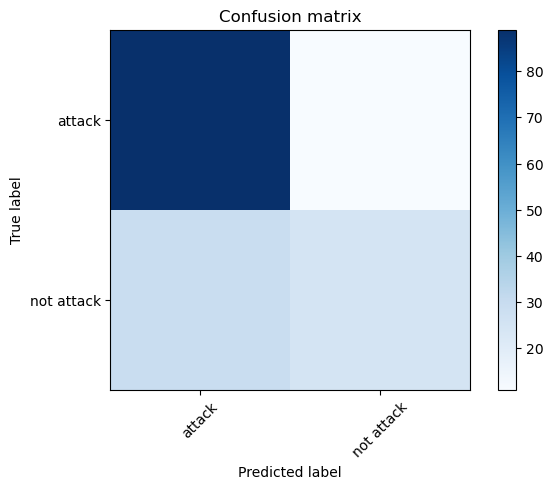

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [31]:
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.69      0.46      0.56        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [32]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
329,6,105,70,32,68,30.8,0.122,37
13,1,189,60,23,846,30.1,0.398,59
476,2,105,80,45,191,33.7,0.711,29
45,0,180,66,39,0,42.0,1.893,25


Making a Predictive System

In [33]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [34]:
import pickle

In [35]:
filename = 'diabetes_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [36]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [37]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [38]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
